<a href="https://colab.research.google.com/github/miltiadiss/CEID_NE577-5G-Architectures-Technologies-Applications-and-Key-Performance-Indicators/blob/main/Code/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fisrt, we load the dataset, remove dublicates and unecessary columns. Also add 'scenario' column.**

In [1]:
import pandas as pd
import numpy as np
import os

data_dir = "/content/drive/MyDrive/Dataset"

# Σενάρια κίνησης (ονομασίες φακέλων)
scenarios = ["train", "pedestrian", "static", "car", "bus"]

# Στήλες που είναι συμβολοσειρές
string_columns = ["State", "NetworkMode", "Operatorname", "Timestamp"]

# Αρχικοποίηση λίστας για την αποθήκευση των DataFrames
trace_dataframes = []

# Διατρέχουμε κάθε φάκελο (σενάριο κίνησης)
for scenario in scenarios:
    scenario_path = os.path.join(data_dir, scenario)

    if os.path.exists(scenario_path):
        for file in os.listdir(scenario_path):
            if file.endswith(".csv"):  # Φιλτράρισμα μόνο των CSV αρχείων
                file_path = os.path.join(scenario_path, file)

                try:
                    # Φόρτωση CSV με αυτόματη αναγνώριση τύπων δεδομένων
                    df = pd.read_csv(file_path, dtype=str)  # Διατηρούμε strings ως έχουν

                    # Καθαρισμός του timestamp χωρίς μετατροπή σε datetime
                    if 'Timestamp' in df.columns:  # Ensure case sensitivity
                        df['Timestamp'] = df['Timestamp'].astype(str).str.strip()
                        df['Timestamp'] = df['Timestamp'].str.replace('_', ' ', regex=False)  # Αντικατάσταση '_' με ' '

                    # Αντικατάσταση "-" στις αριθμητικές στήλες με NaN
                    for col in df.columns:
                        if col not in string_columns:
                            df[col] = df[col].replace("-", np.nan)
                            df[col] = pd.to_numeric(df[col], errors='coerce')

                    # Αφαίρεση διπλότυπων εγγραφών
                    df.drop_duplicates(inplace=True)

                    # Αφαίρεση στηλών που περιέχουν τις συντεταγμένες του mobile device και του cell
                    df.drop(columns=['Longitude', 'Latitude', 'ServingCell_Lon', 'ServingCell_Lat'], inplace=True)

                    # Προσθήκη ετικέτας σεναρίου κίνησης
                    df['scenario'] = scenario

                    # Αποθήκευση του DataFrame στη λίστα
                    trace_dataframes.append(df)

                except Exception as e:
                    print(f"Σφάλμα κατά την επεξεργασία του αρχείου {file_path}: {e}")

# Συνένωση όλων των traces σε ένα ενιαίο DataFrame
if trace_dataframes:
    combined_data = pd.concat(trace_dataframes, ignore_index=True)
    combined_data.to_csv("combined_dataset.csv", index=False, na_rep="NaN")

# Εμφάνιση του τελικού σχήματος των δεδομένων
print(combined_data.shape)

<ipython-input-1-de0cc8574ad7>:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace("-", np.nan)
<ipython-input-1-de0cc8574ad7>:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace("-", np.nan)
<ipython-input-1-de0cc8574ad7>:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

(173692, 17)


In [2]:
combined_data

,Timestamp,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Distance,scenario
0,2017.11.24 14.34.43,0,A,1,LTE,-88,-12.0,17.0,10.0,-71.0,49,36,D,NaN,NaN,394.10,train
1,2017.11.24 14.34.44,2,A,1,LTE,-88,-12.0,8.0,9.0,-73.0,49,36,D,NaN,NaN,376.58,train
2,2017.11.24 14.34.45,2,A,1,LTE,-88,-12.0,17.0,10.0,-71.0,173,6,D,NaN,NaN,376.58,train
3,2017.11.24 14.34.46,2,A,1,LTE,-85,-12.0,16.0,10.0,-69.0,0,0,I,NaN,NaN,376.58,train
4,2017.11.24 14.34.47,2,A,1,LTE,-85,-12.0,16.0,10.0,-75.0,0,0,I,NaN,NaN,376.58,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173687,2018.01.27 11.22.32,1,A,1,LTE,-89,-10.0,-6.0,2.0,-72.0,7079,114,D,-94.0,-14.0,840.35,bus
173688,2018.01.27 11.22.34,1,A,1,LTE,-89,-10.0,-6.0,2.0,-72.0,9506,116,D,NaN,NaN,840.35,bus
173689,2018.01.27 11.22.34,1,A,1,LTE,-88,-14.0,-3.0,2.0,-72.0,13365,194,D,-92.0,-17.0,840.35,bus
173690,2018.01.27 11.22.36,1,A,1,LTE,-88,-14.0,-3.0,2.0,-72.0,15232,185,D,-92.0,-17.0,840.35,bus


###**Numerical features**

**Replace NULL values with mean value of the numeric feature**

In [3]:
# Φόρτωση δεδομένων
df = pd.read_csv("combined_dataset.csv")

# Αφαίρεση μη αριθμητικών στηλών
non_numeric_columns = ['Timestamp', 'State', 'NetworkMode', 'Operatorname', 'CellID', 'scenario']
numeric_columns = [col for col in df.columns if col not in non_numeric_columns]

# Αντικατάσταση των NaN τιμών στις αριθμητικές στήλες με τον μέσο όρο τους
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

In [4]:
df

,Timestamp,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Distance,scenario
0,2017.11.24 14.34.43,0,A,1,LTE,-88,-12.0,17.0,10.0,-71.0,49,36,D,-81.007408,-19.123309,394.10,train
1,2017.11.24 14.34.44,2,A,1,LTE,-88,-12.0,8.0,9.0,-73.0,49,36,D,-81.007408,-19.123309,376.58,train
2,2017.11.24 14.34.45,2,A,1,LTE,-88,-12.0,17.0,10.0,-71.0,173,6,D,-81.007408,-19.123309,376.58,train
3,2017.11.24 14.34.46,2,A,1,LTE,-85,-12.0,16.0,10.0,-69.0,0,0,I,-81.007408,-19.123309,376.58,train
4,2017.11.24 14.34.47,2,A,1,LTE,-85,-12.0,16.0,10.0,-75.0,0,0,I,-81.007408,-19.123309,376.58,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173687,2018.01.27 11.22.32,1,A,1,LTE,-89,-10.0,-6.0,2.0,-72.0,7079,114,D,-94.000000,-14.000000,840.35,bus
173688,2018.01.27 11.22.34,1,A,1,LTE,-89,-10.0,-6.0,2.0,-72.0,9506,116,D,-81.007408,-19.123309,840.35,bus
173689,2018.01.27 11.22.34,1,A,1,LTE,-88,-14.0,-3.0,2.0,-72.0,13365,194,D,-92.000000,-17.000000,840.35,bus
173690,2018.01.27 11.22.36,1,A,1,LTE,-88,-14.0,-3.0,2.0,-72.0,15232,185,D,-92.000000,-17.000000,840.35,bus


**Use Q-Q plots to check if numeric features follow Normal Distribution**

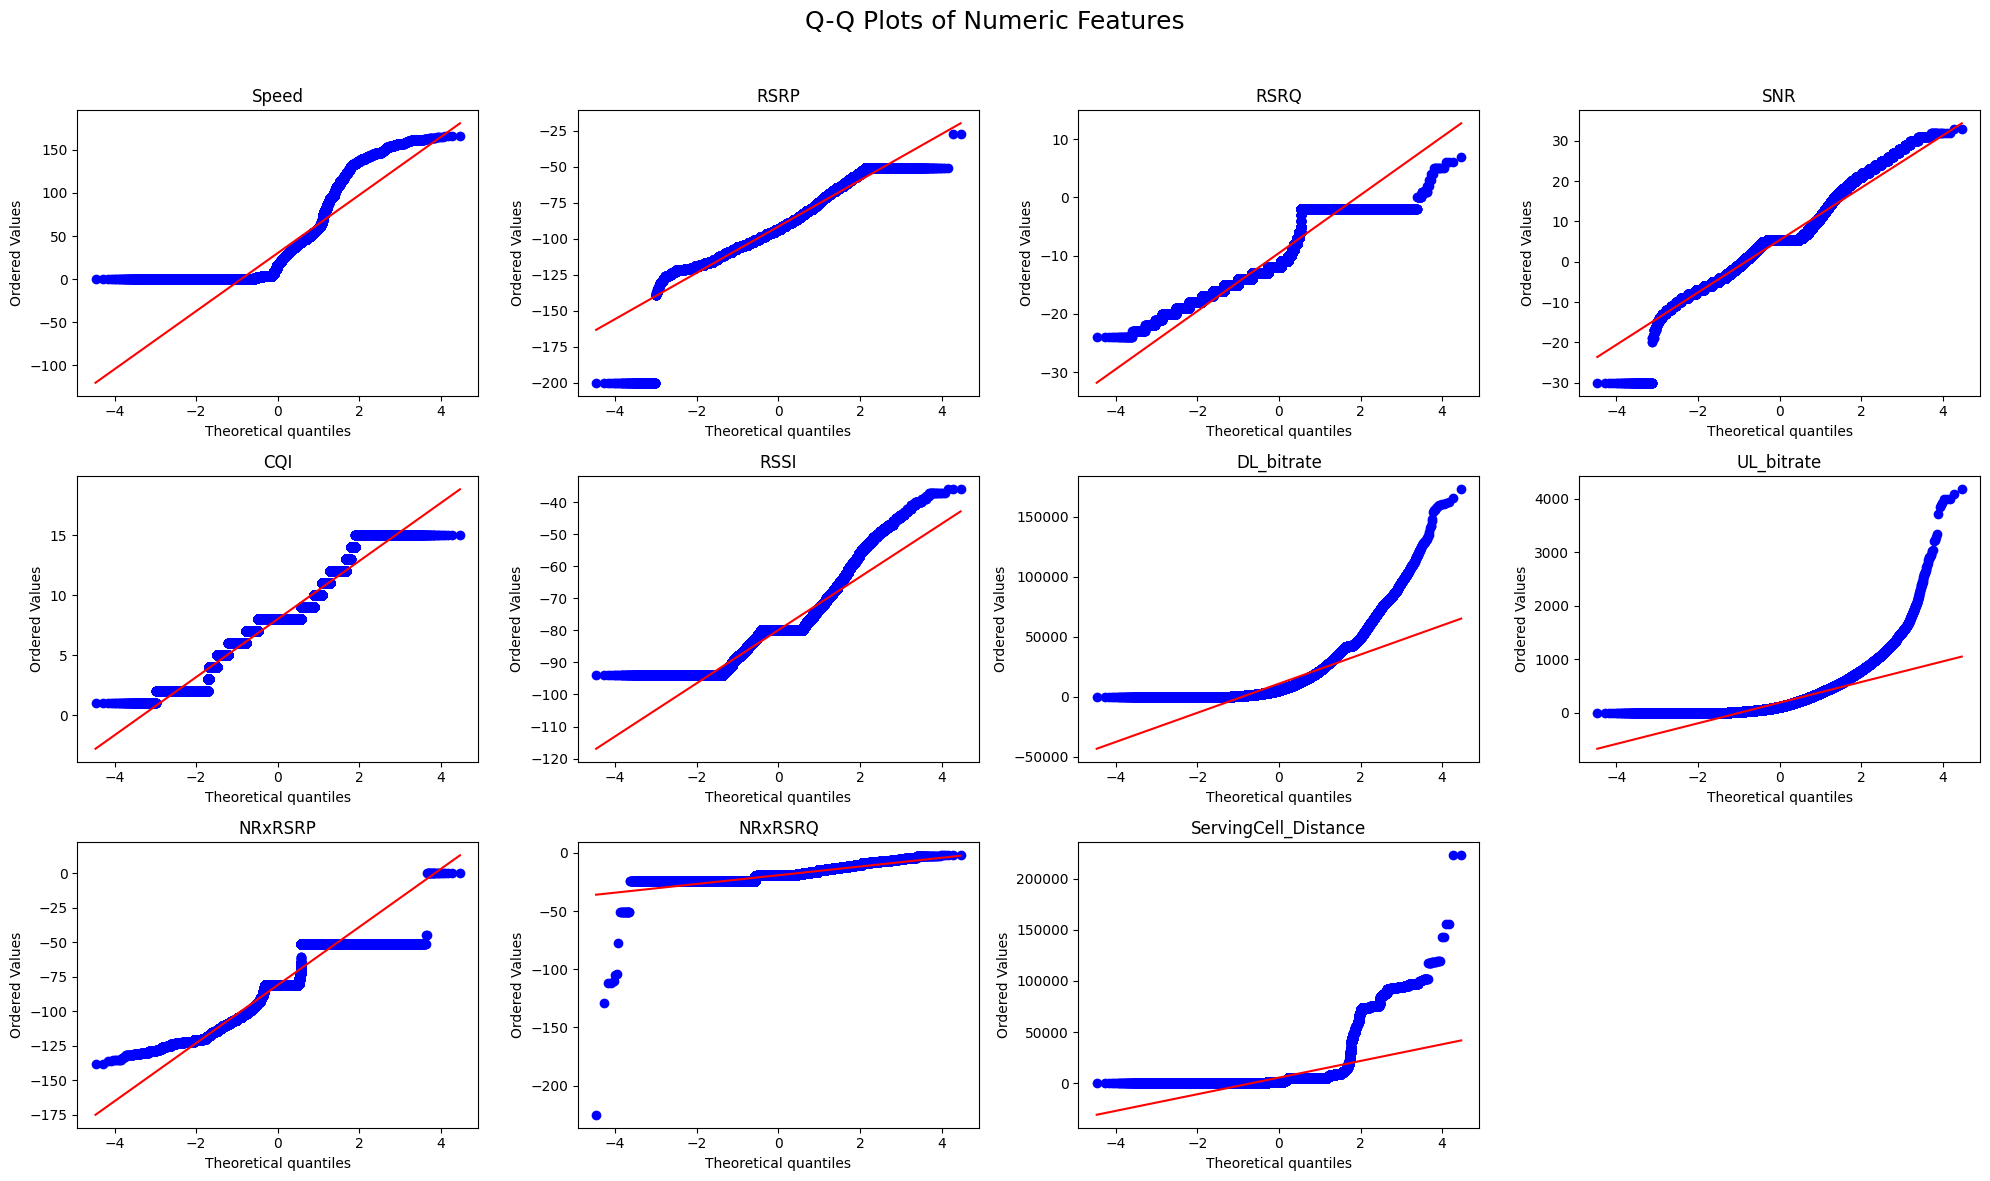

In [6]:
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

# Ορισμός των διαστάσεων του grid
cols = 4  # Κάθε σειρά έχει 4 plots
rows = math.ceil(len(numeric_columns) / cols)  # Υπολογισμός σειρών δυναμικά

# Δημιουργία figure και subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
fig.suptitle("Q-Q Plots of Numeric Features", fontsize=18)

# Flatten για εύκολη διαχείριση
axes = axes.flatten()

# Σχεδίαση Q-Q plots για κάθε χαρακτηριστικό
for i, column in enumerate(numeric_columns):
    stats.probplot(df[column].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f'{column}')

# Αφαίρεση κενών subplots αν υπάρχουν
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

# Προσαρμογή layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Since most features don't follow Normal Distribution, we detect the outliers using the IQR Method and apply capping to correct them.**

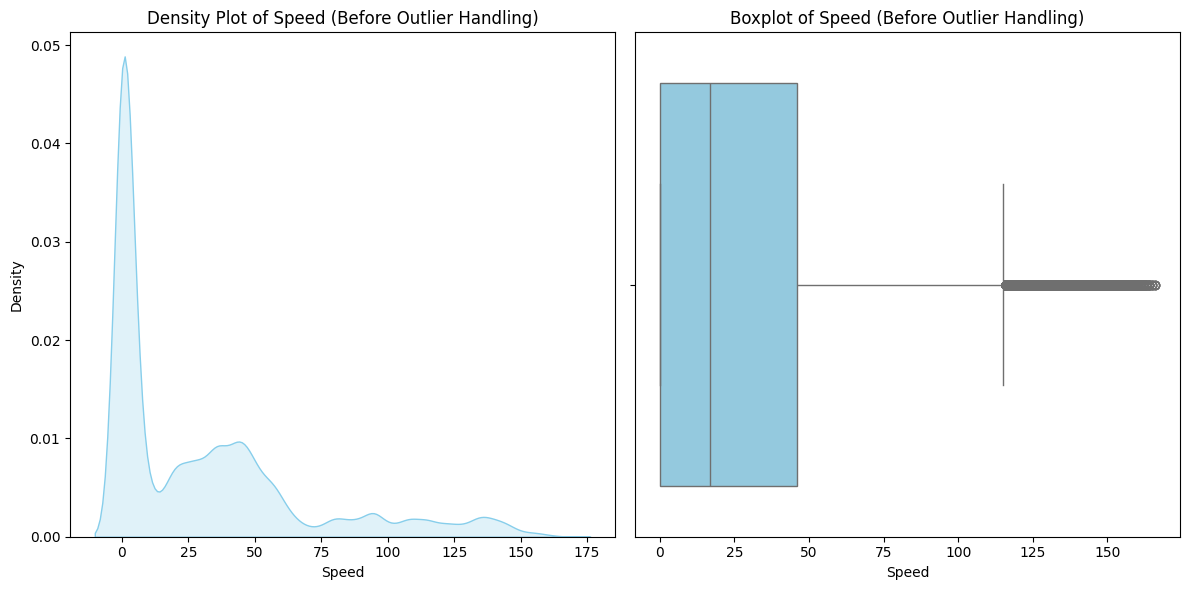

For column Speed:
Q1 = 0.0, Q3 = 46.0, IQR = 46.0
Lower Bound = -69.0, Upper Bound = 115.0
Number of Outliers: 9520



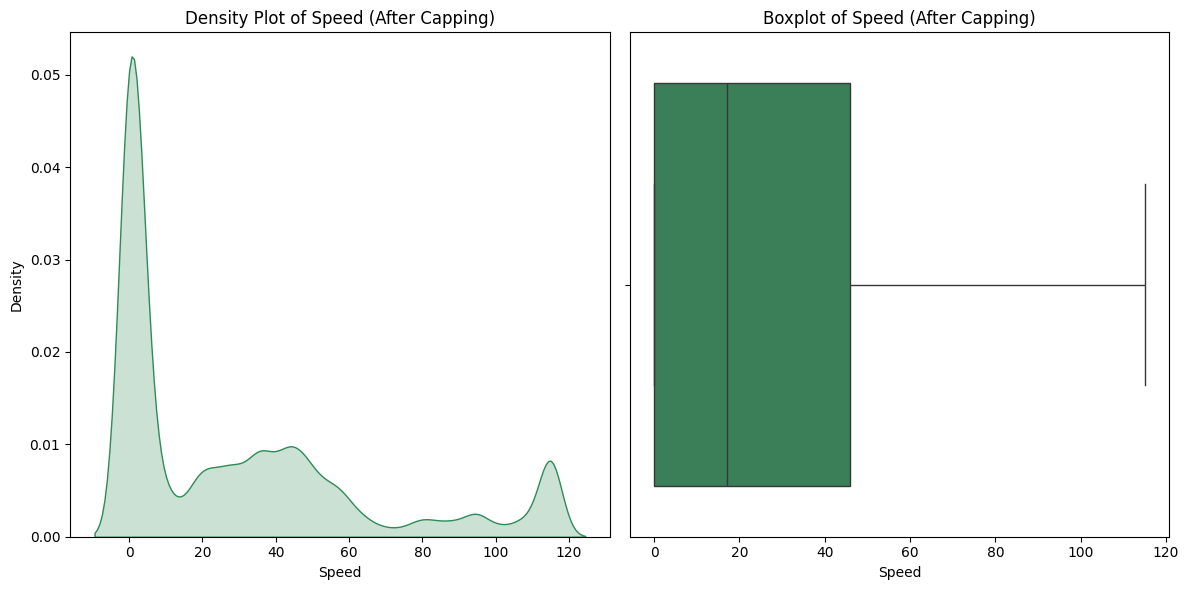

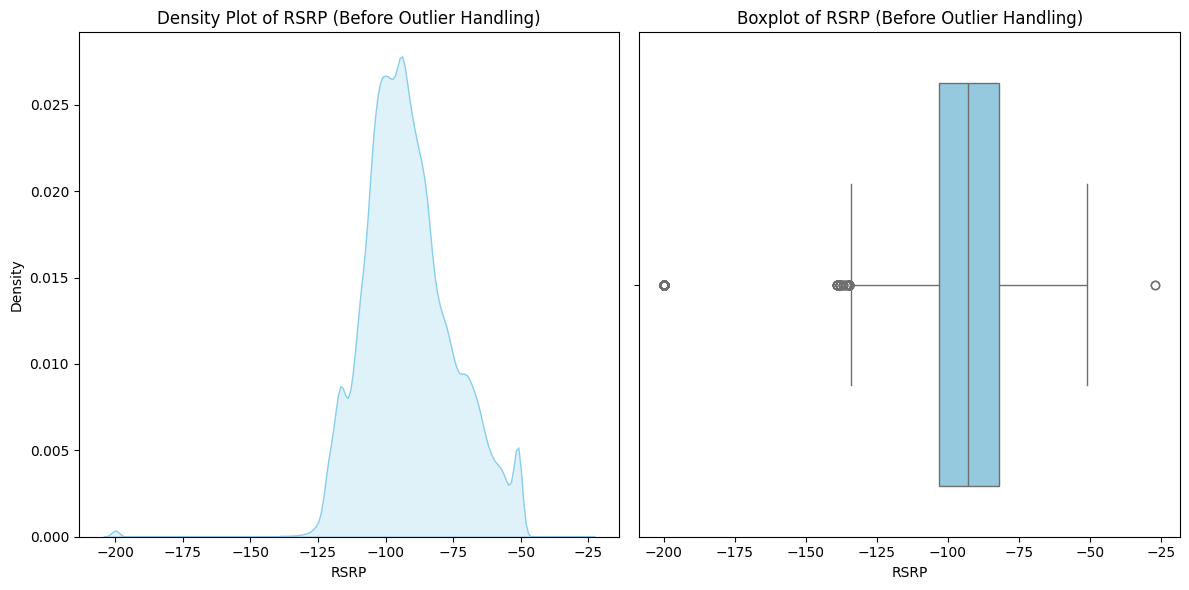

For column RSRP:
Q1 = -103.0, Q3 = -82.0, IQR = 21.0
Lower Bound = -134.5, Upper Bound = -50.5
Number of Outliers: 288



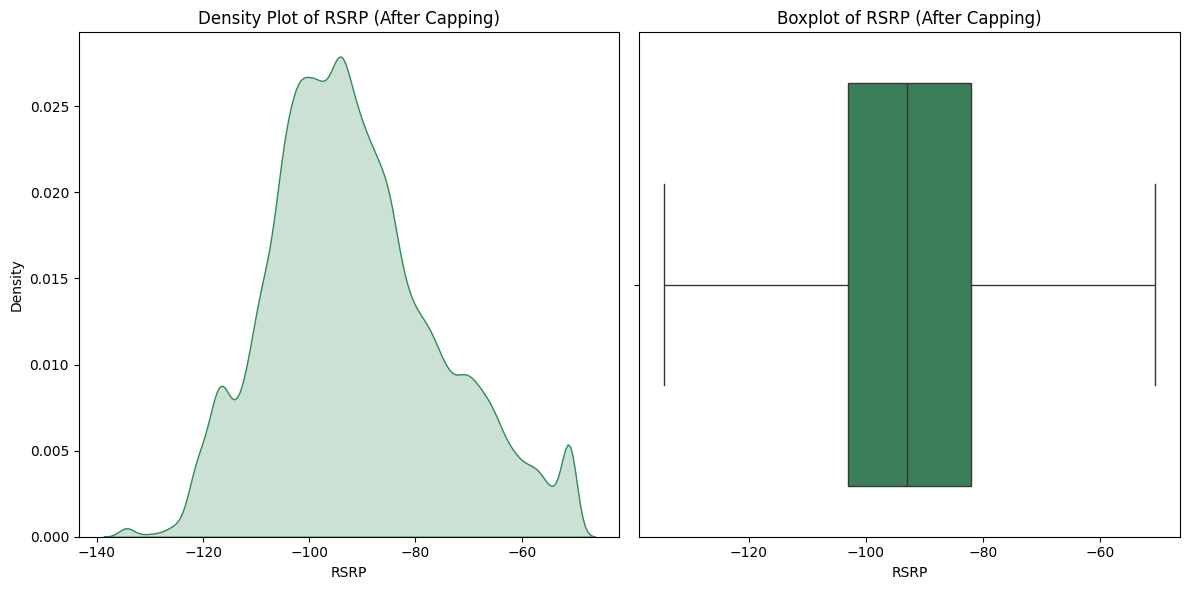

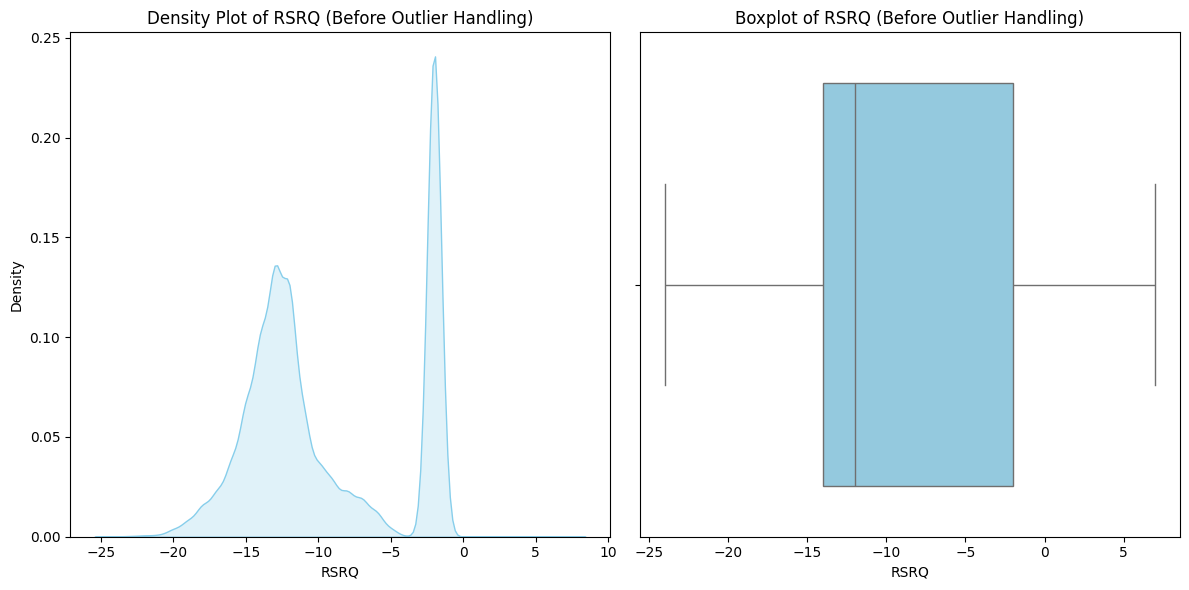

For column RSRQ:
Q1 = -14.0, Q3 = -2.0, IQR = 12.0
Lower Bound = -32.0, Upper Bound = 16.0
Number of Outliers: 0



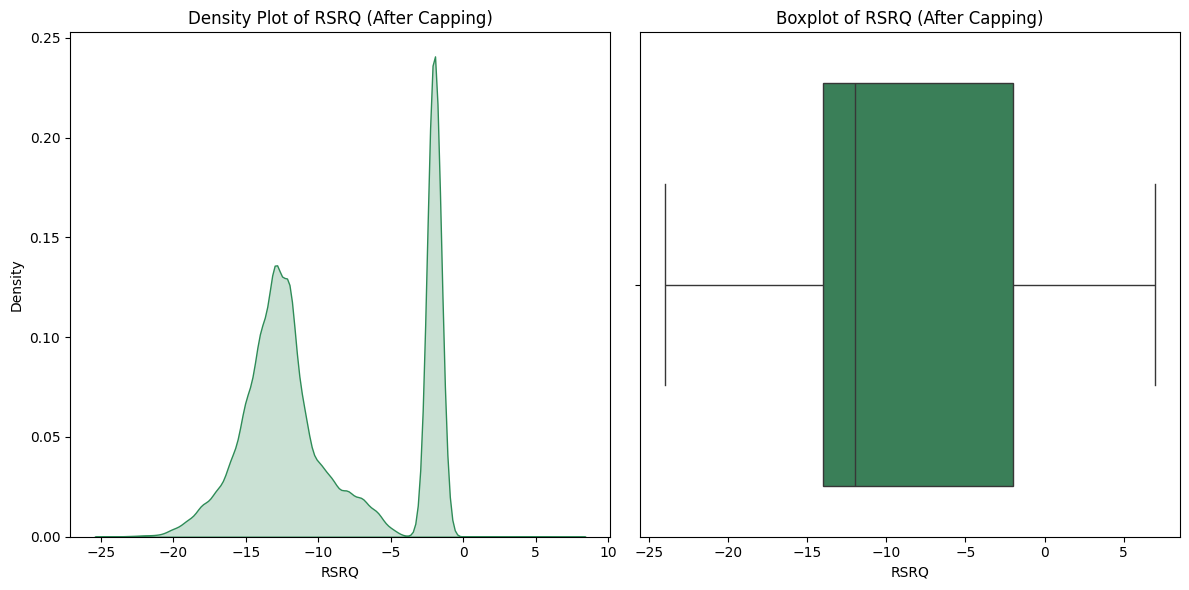

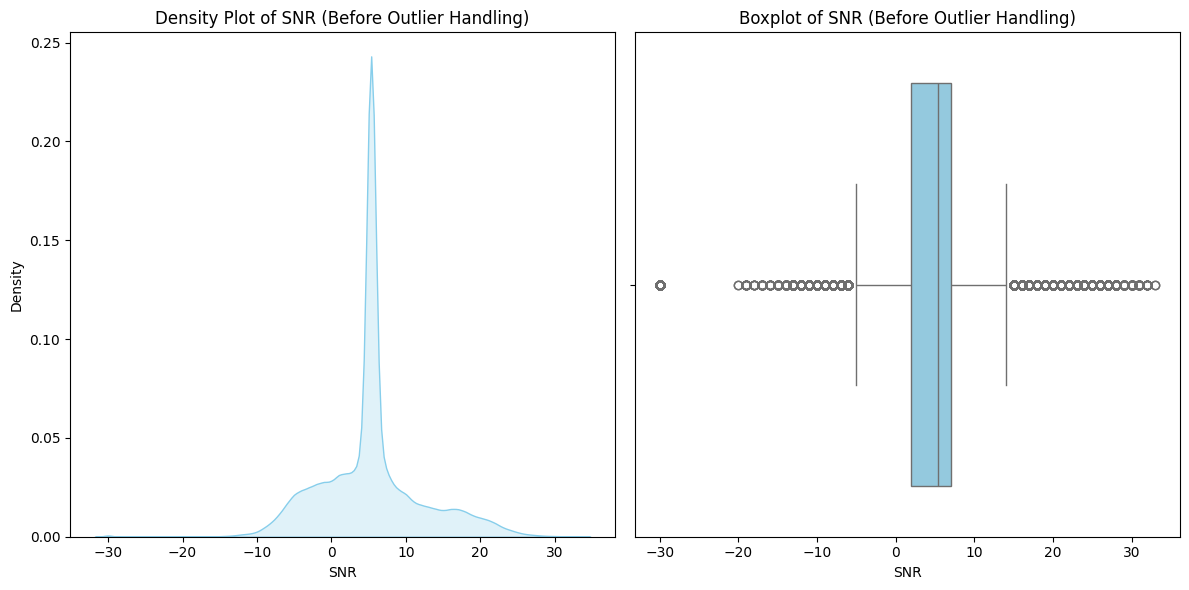

For column SNR:
Q1 = 2.0, Q3 = 7.0, IQR = 5.0
Lower Bound = -5.5, Upper Bound = 14.5
Number of Outliers: 26547



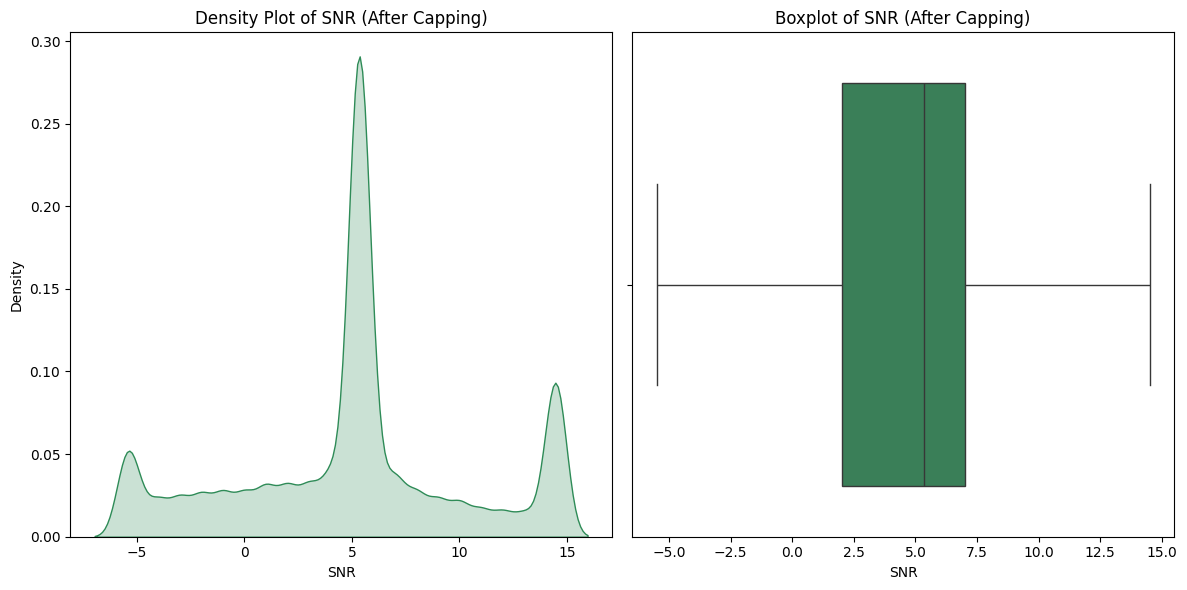

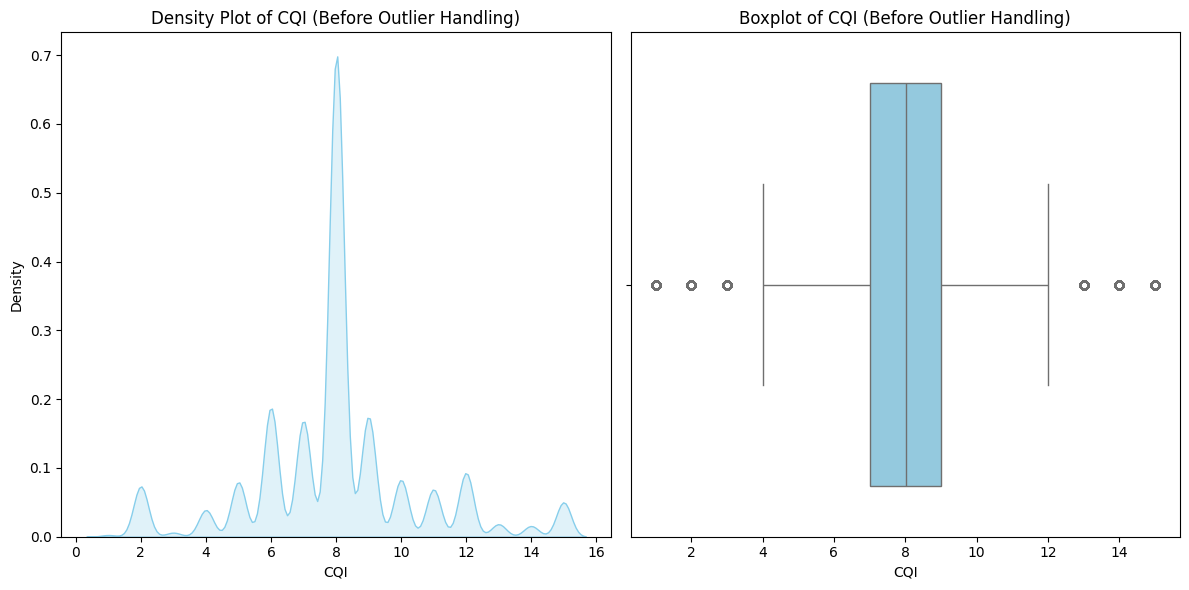

For column CQI:
Q1 = 7.0, Q3 = 9.0, IQR = 2.0
Lower Bound = 4.0, Upper Bound = 12.0
Number of Outliers: 16334



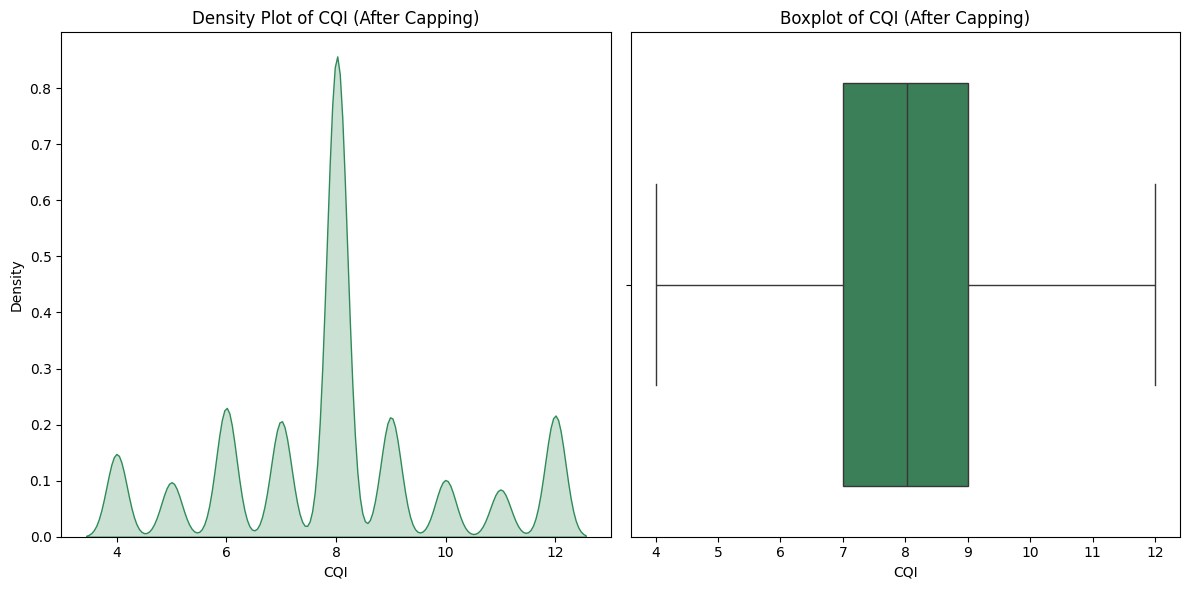

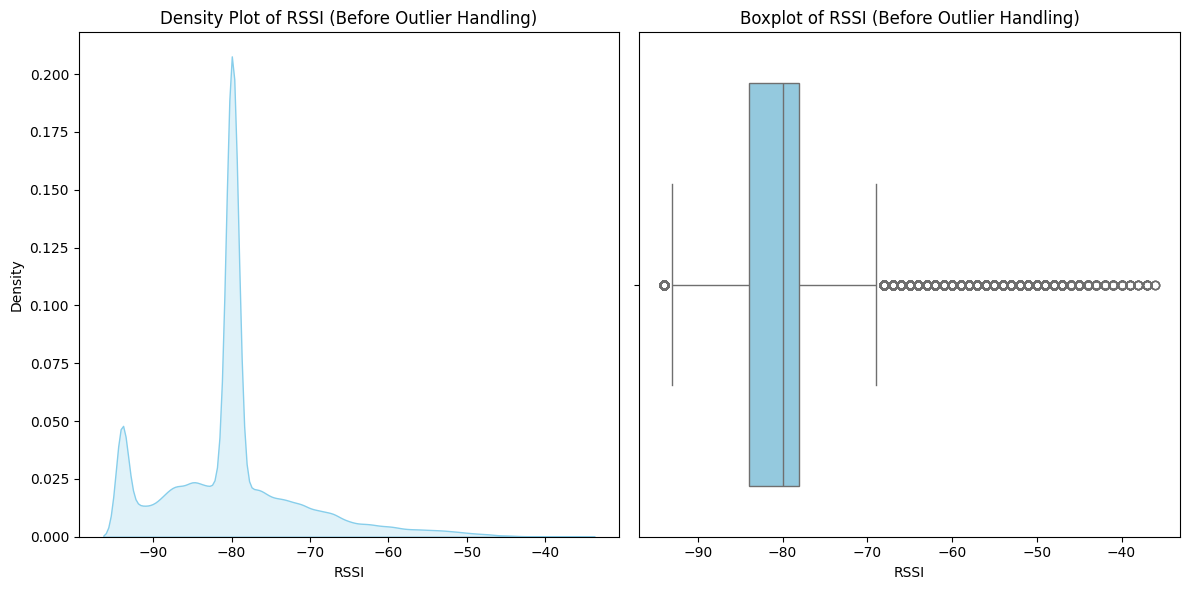

For column RSSI:
Q1 = -84.0, Q3 = -78.0, IQR = 6.0
Lower Bound = -93.0, Upper Bound = -69.0
Number of Outliers: 32004



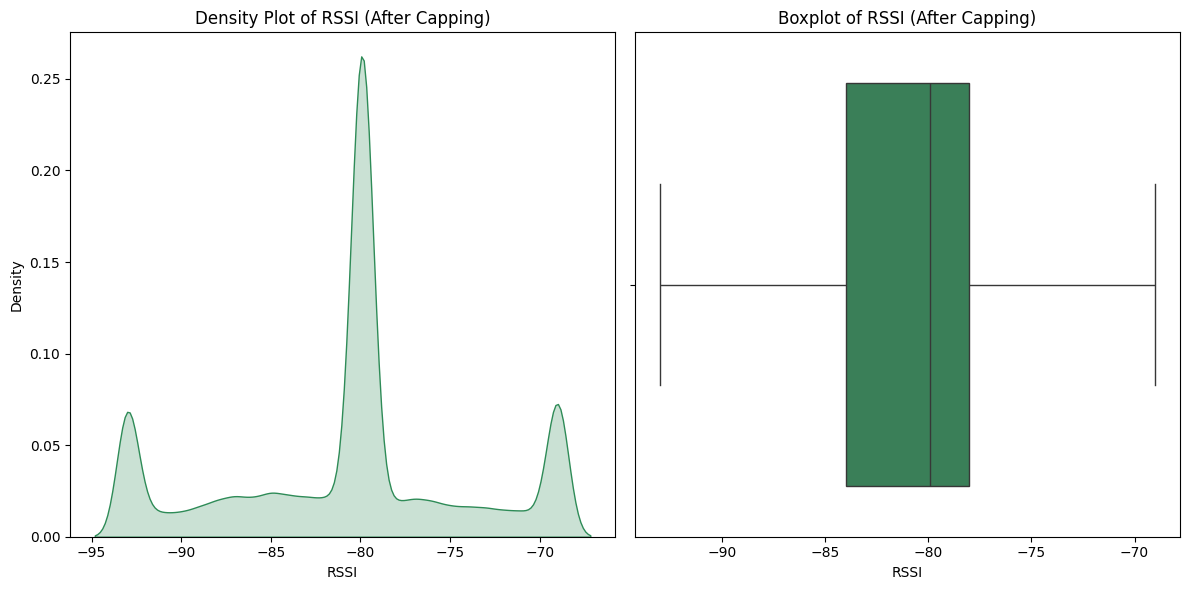

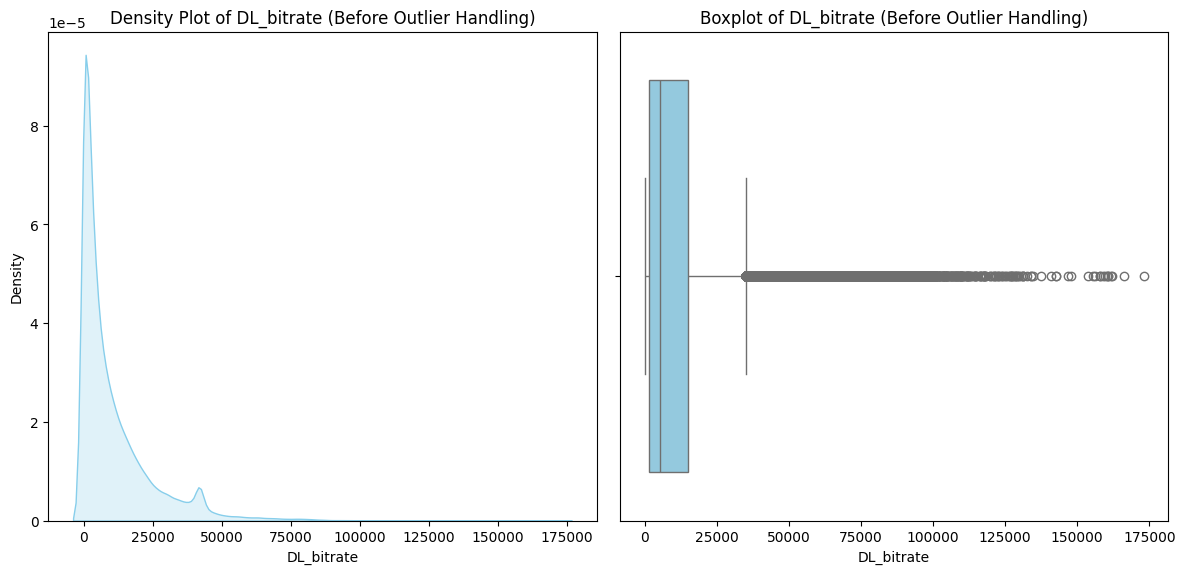

For column DL_bitrate:
Q1 = 1420.0, Q3 = 14841.0, IQR = 13421.0
Lower Bound = -18711.5, Upper Bound = 34972.5
Number of Outliers: 13177



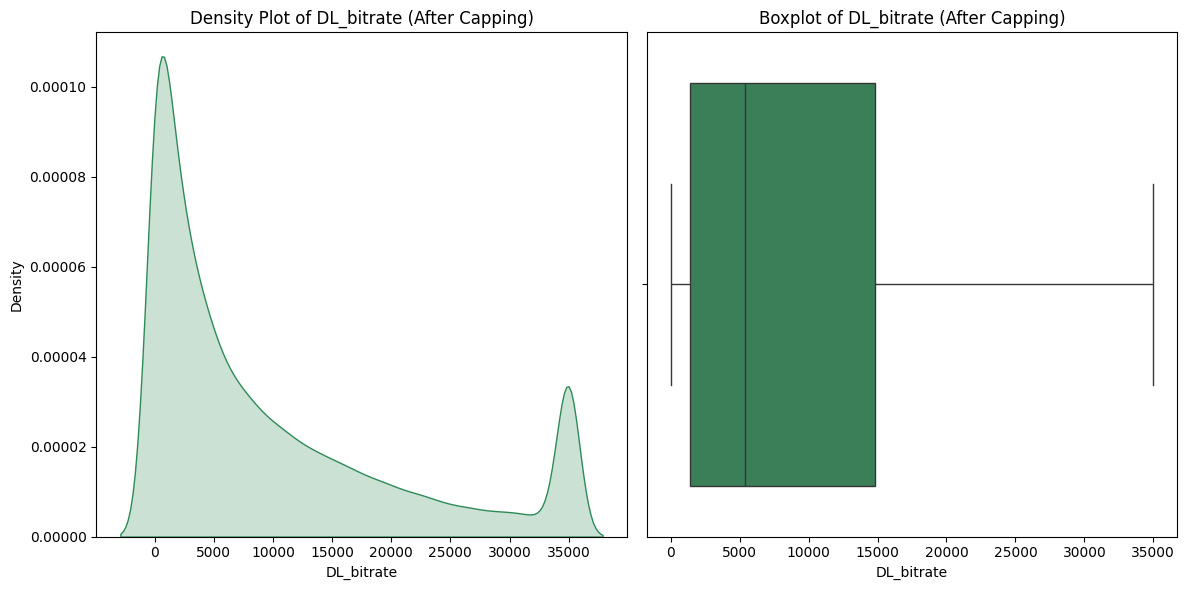

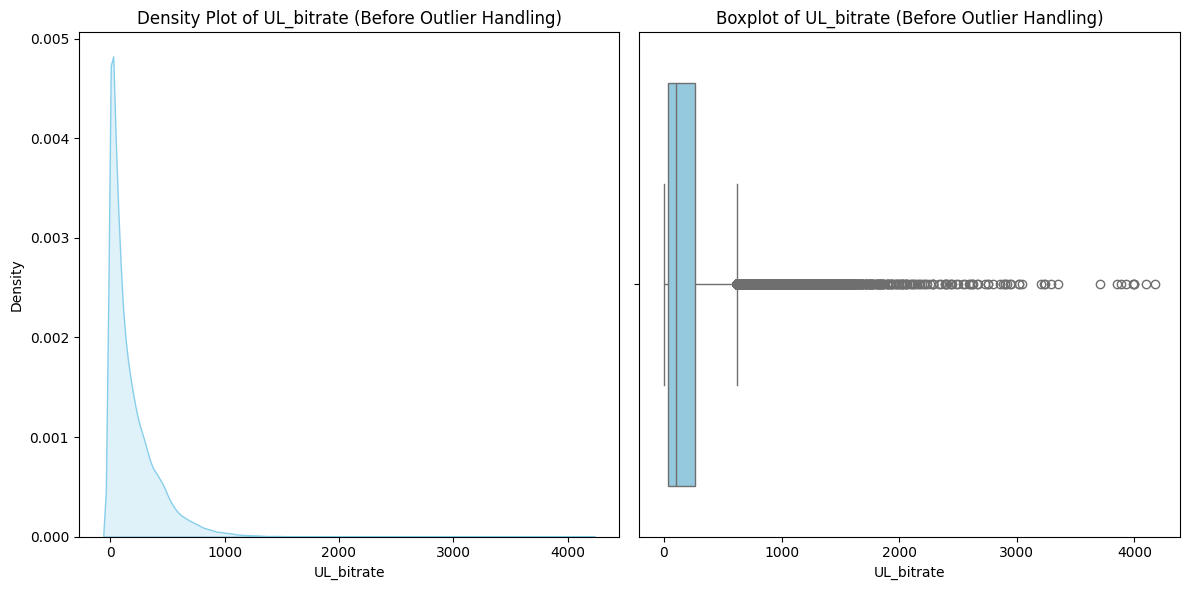

For column UL_bitrate:
Q1 = 32.0, Q3 = 267.0, IQR = 235.0
Lower Bound = -320.5, Upper Bound = 619.5
Number of Outliers: 8533



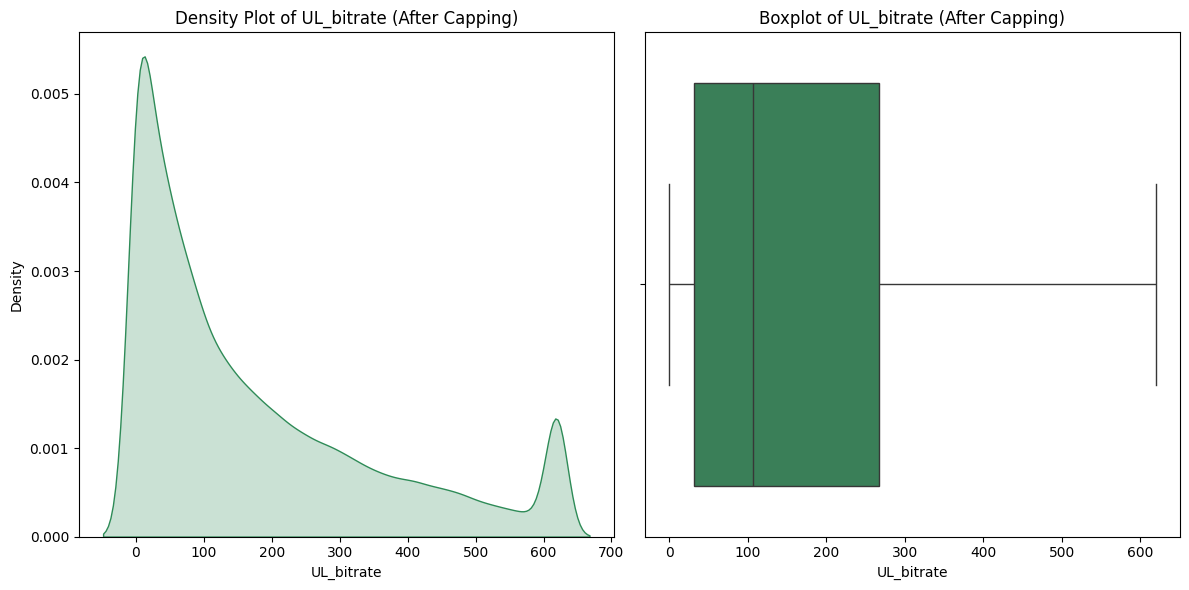

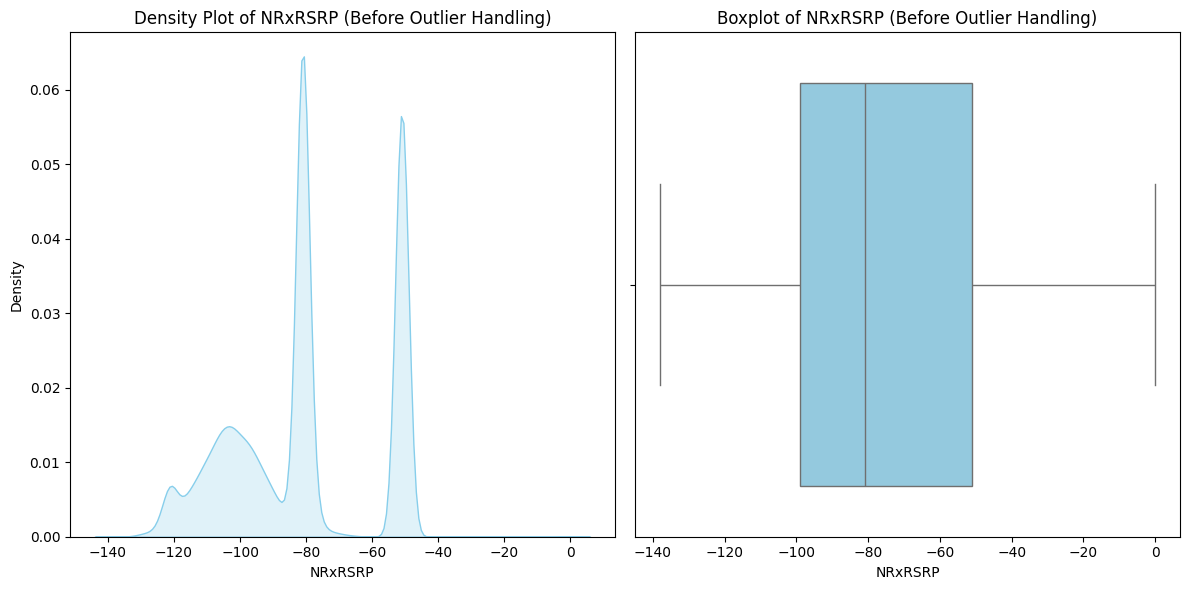

For column NRxRSRP:
Q1 = -99.0, Q3 = -51.0, IQR = 48.0
Lower Bound = -171.0, Upper Bound = 21.0
Number of Outliers: 0



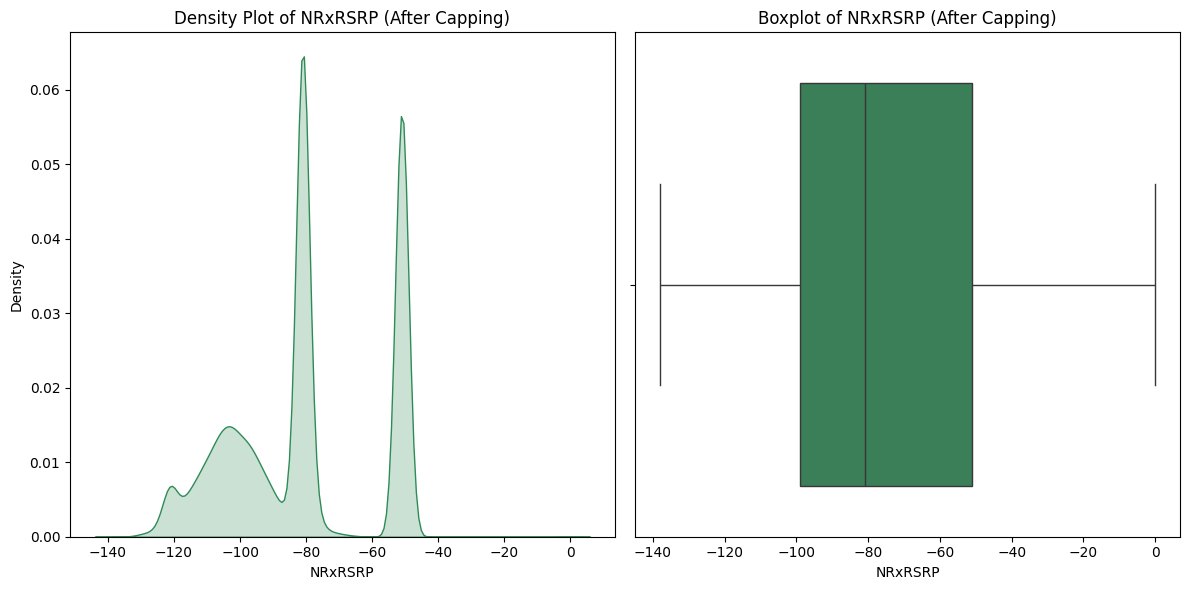

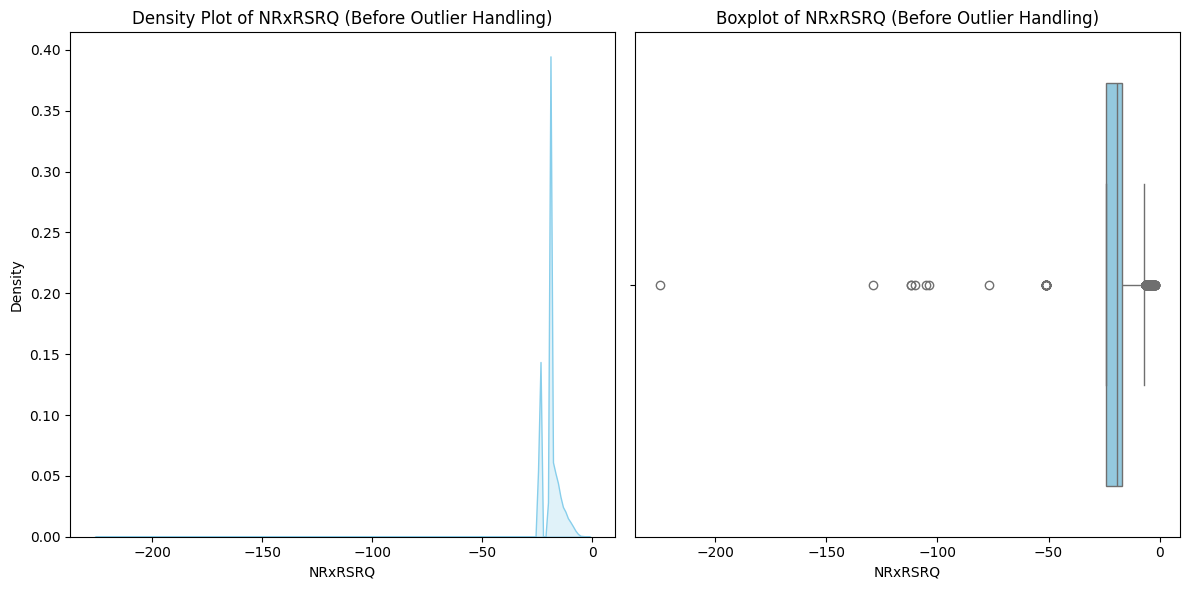

For column NRxRSRQ:
Q1 = -24.0, Q3 = -17.0, IQR = 7.0
Lower Bound = -34.5, Upper Bound = -6.5
Number of Outliers: 535



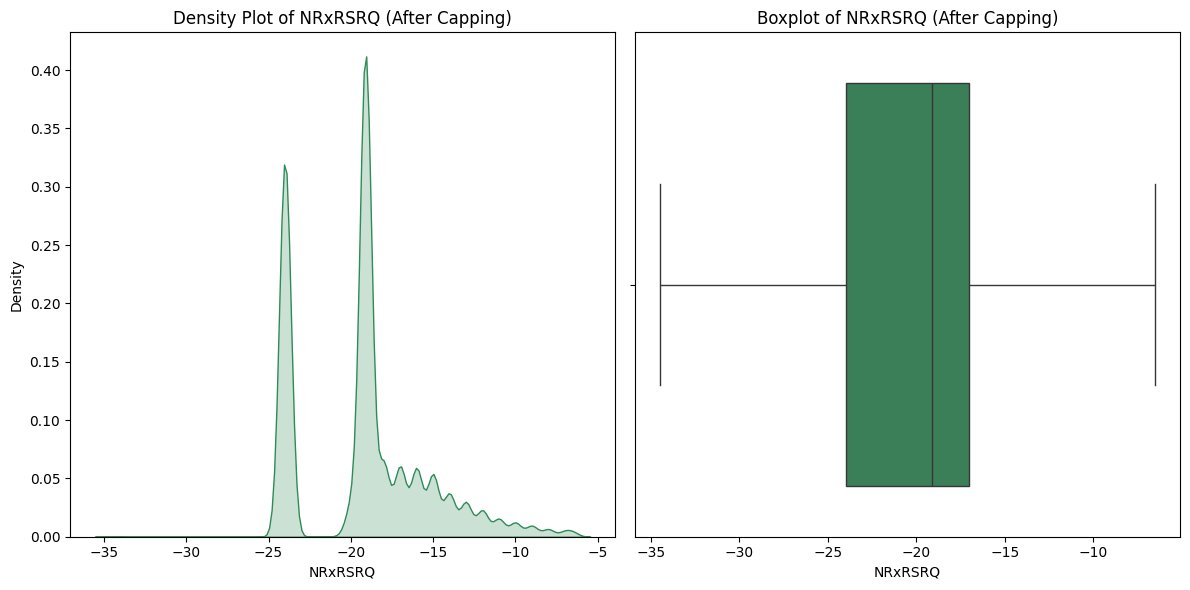

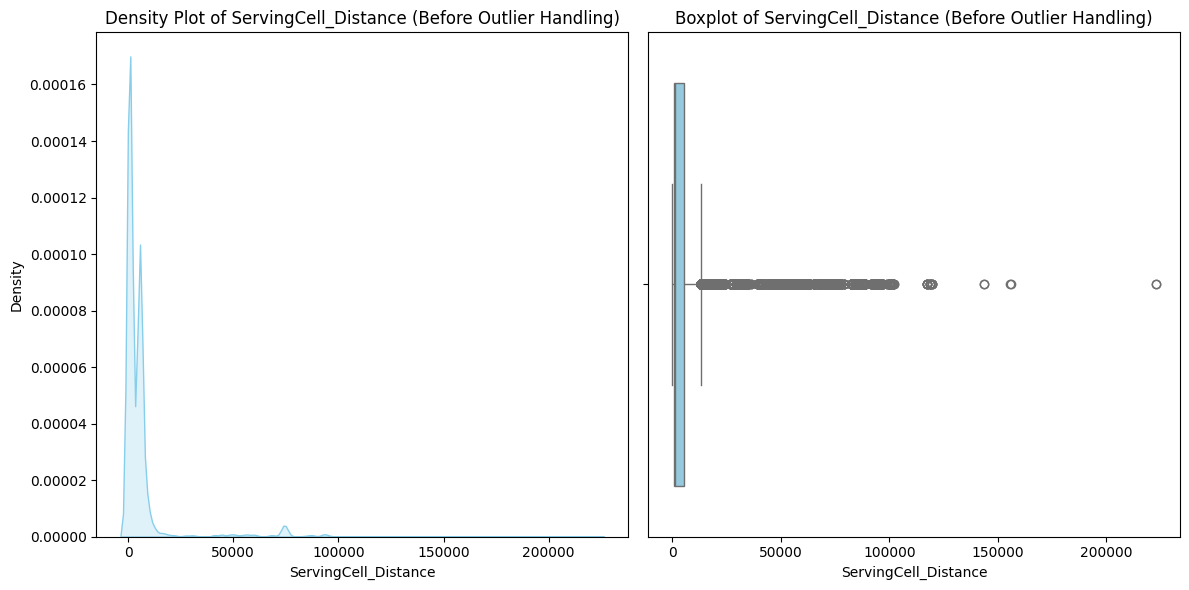

For column ServingCell_Distance:
Q1 = 595.84, Q3 = 5637.701759642764, IQR = 5041.861759642764
Lower Bound = -6966.952639464145, Upper Bound = 13200.494399106909
Number of Outliers: 8879



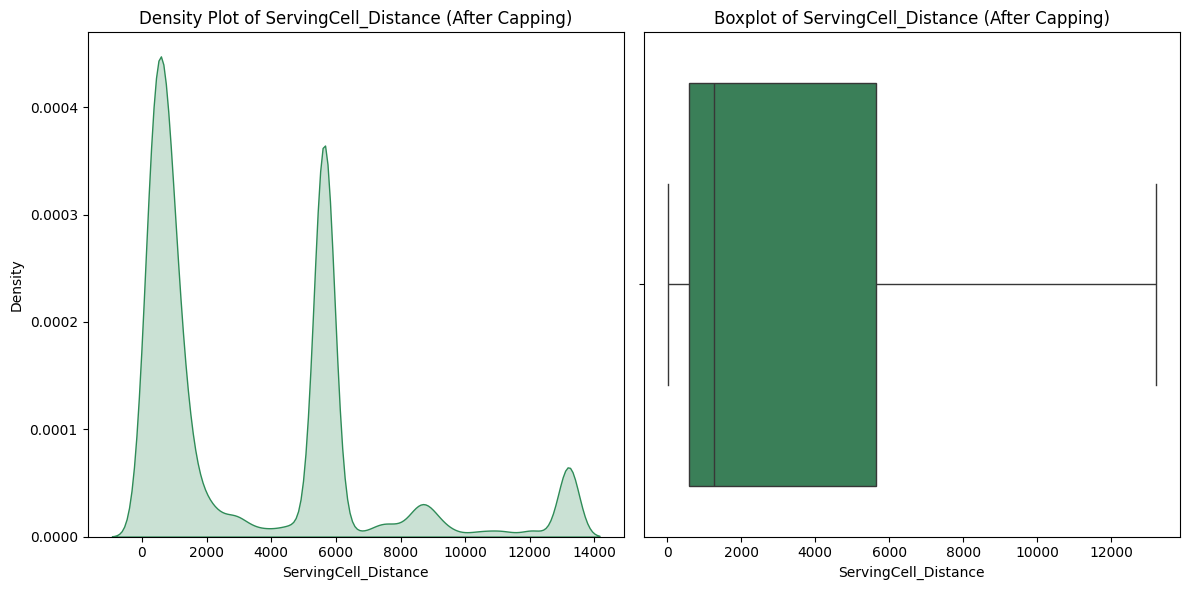

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Εξερεύνηση δεδομένων ανά χαρακτηριστικό
for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    # Density Plot πριν τον χειρισμό των outliers
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[column], fill=True, color="skyblue")
    plt.title(f'Density Plot of {column} (Before Outlier Handling)')
    plt.xlabel(column)

    # Boxplot πριν τον χειρισμό των outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color="skyblue")
    plt.title(f'Boxplot of {column} (Before Outlier Handling)')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

    # Εντοπισμός outliers βάσει IQR
    Q1 = np.percentile(df[column].dropna(), 25)
    Q3 = np.percentile(df[column].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Χρησιμοποιούμε 1.5 * IQR (ή 3 * IQR αν θέλεις πιο αυστηρό φιλτράρισμα)
    upper_bound = Q3 + 1.5 * IQR

    print(f"For column {column}:")
    print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of Outliers: {len(outliers)}")
    print()

    # **Capping των outliers αντί να τα αφαιρούμε**
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    # Density Plot και Boxplot μετά το capping
    plt.figure(figsize=(12, 6))

    # Density Plot μετά τον χειρισμό των outliers
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[column], fill=True, color="seagreen")
    plt.title(f'Density Plot of {column} (After Capping)')
    plt.xlabel(column)

    # Boxplot μετά το capping
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color="seagreen")
    plt.title(f'Boxplot of {column} (After Capping)')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

**Finally, apply Z-Score Normalization since the numeric features are measured in different units.**

In [8]:
for column in numeric_columns:
    mean_value = df[column].mean()
    std_value = df[column].std()
    df[column] = (df[column] - mean_value) / std_value

**We now sort the dataset instances based on the timestamp is ascending order.**

In [11]:
# Μετατροπή της στήλης Timestamp σε datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%Y.%m.%d %H.%M.%S")

# Ταξινόμηση των δεδομένων με βάση το Timestamp (Αύξουσα σειρά)
df = df.sort_values(by="Timestamp", ascending=True)

# Επαναφορά των index μετά την ταξινόμηση
df = df.reset_index(drop=True)

# Αφαιρούμε τις ημερομηνίες εφόσον δεν χρειάζονται
df.drop(columns=['Timestamp'], inplace=True)

In [12]:
df

,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Distance,scenario
0,-0.831615,A,2,LTE,-0.223698,-0.638928,-0.186506,0.967794,0.091042,-0.908082,-0.970607,D,-1.275175e-15,-0.000262,-0.807820,pedestrian
1,-0.831615,A,2,LTE,-0.223698,-0.638928,-0.555608,-0.000039,0.385920,-0.908082,-0.970607,I,-1.275175e-15,-0.000262,-0.807820,pedestrian
2,-0.831615,A,2,LTE,-0.223698,-0.638928,1.474457,0.483877,0.091042,-0.908082,-0.970607,I,-1.275175e-15,-0.000262,-0.807241,pedestrian
3,-0.803099,A,2,LTE,-0.223698,-0.638928,1.474457,0.483877,0.091042,-0.908082,-0.970607,I,-1.275175e-15,-0.000262,-0.804415,pedestrian
4,-0.803099,A,2,LTE,-0.349234,-0.638928,-1.293814,0.483877,0.091042,-0.908082,-0.970607,I,-1.275175e-15,-0.000262,-0.804415,pedestrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173687,-0.831615,B,3,LTE,-0.788612,-0.268309,1.474457,0.967794,-0.351275,2.331298,2.487438,D,-1.275175e-15,-0.000262,-0.777253,static
173688,-0.831615,A,2,LTE,-0.914148,-0.638928,-0.371057,-0.483955,-1.383349,-0.491634,-0.529630,D,-1.275175e-15,-0.000262,-0.849081,static
173689,-0.831615,B,3,LTE,-0.788612,-0.268309,1.474457,0.967794,-0.351275,2.331298,2.487438,D,-1.275175e-15,-0.000262,-0.777253,static
173690,-0.831615,B,3,LTE,-0.537539,-0.453619,1.751284,1.935626,-0.056397,2.331298,2.487438,D,-1.275175e-15,-0.000262,-0.777253,static


###**Categorical features**

**We combine all the categorical features in one numerical feature called "Categorical_Impact" using the principal component with the biggest variance from PCA Analysis.**

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Κατηγορικά χαρακτηριστικά προς κωδικοποίηση
categorical_features = ["State", "NetworkMode", "Operatorname", "CellID", "scenario"]

# One-Hot Encoding των κατηγορικών χαρακτηριστικών
encoder = OneHotEncoder(drop='first')
encoded_cats = encoder.fit_transform(df[categorical_features])

# PCA για μείωση διαστάσεων
pca = PCA(n_components=1)  # Κρατάμε μόνο το κύριο component με το μεγαλυτερο variance
categorical_pca_feature = pca.fit_transform(encoded_cats)

# Προσθήκη του νέου feature στο dataframe
df["Categorical_Impact"] = categorical_pca_feature

# Αφαίρεση των αρχικών κατηγορικών χαρακτηριστικών
df.drop(columns=categorical_features, inplace=True)

In [19]:
df

,Speed,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ,ServingCell_Distance,Categorical_Impact
0,-0.831615,-0.223698,-0.638928,-0.186506,0.967794,0.091042,-0.908082,-0.970607,-1.275175e-15,-0.000262,-0.807820,0.664633
1,-0.831615,-0.223698,-0.638928,-0.555608,-0.000039,0.385920,-0.908082,-0.970607,-1.275175e-15,-0.000262,-0.807820,0.536313
2,-0.831615,-0.223698,-0.638928,1.474457,0.483877,0.091042,-0.908082,-0.970607,-1.275175e-15,-0.000262,-0.807241,0.536313
3,-0.803099,-0.223698,-0.638928,1.474457,0.483877,0.091042,-0.908082,-0.970607,-1.275175e-15,-0.000262,-0.804415,0.536313
4,-0.803099,-0.349234,-0.638928,-1.293814,0.483877,0.091042,-0.908082,-0.970607,-1.275175e-15,-0.000262,-0.804415,0.536313
...,...,...,...,...,...,...,...,...,...,...,...,...
173687,-0.831615,-0.788612,-0.268309,1.474457,0.967794,-0.351275,2.331298,2.487438,-1.275175e-15,-0.000262,-0.777253,0.533006
173688,-0.831615,-0.914148,-0.638928,-0.371057,-0.483955,-1.383349,-0.491634,-0.529630,-1.275175e-15,-0.000262,-0.849081,0.526842
173689,-0.831615,-0.788612,-0.268309,1.474457,0.967794,-0.351275,2.331298,2.487438,-1.275175e-15,-0.000262,-0.777253,0.533006
173690,-0.831615,-0.537539,-0.453619,1.751284,1.935626,-0.056397,2.331298,2.487438,-1.275175e-15,-0.000262,-0.777253,0.533006


**Finally, we must add the lagged features.**

**We must check how many lags should be used used for the input features based on their Autocorrelation Functions.**

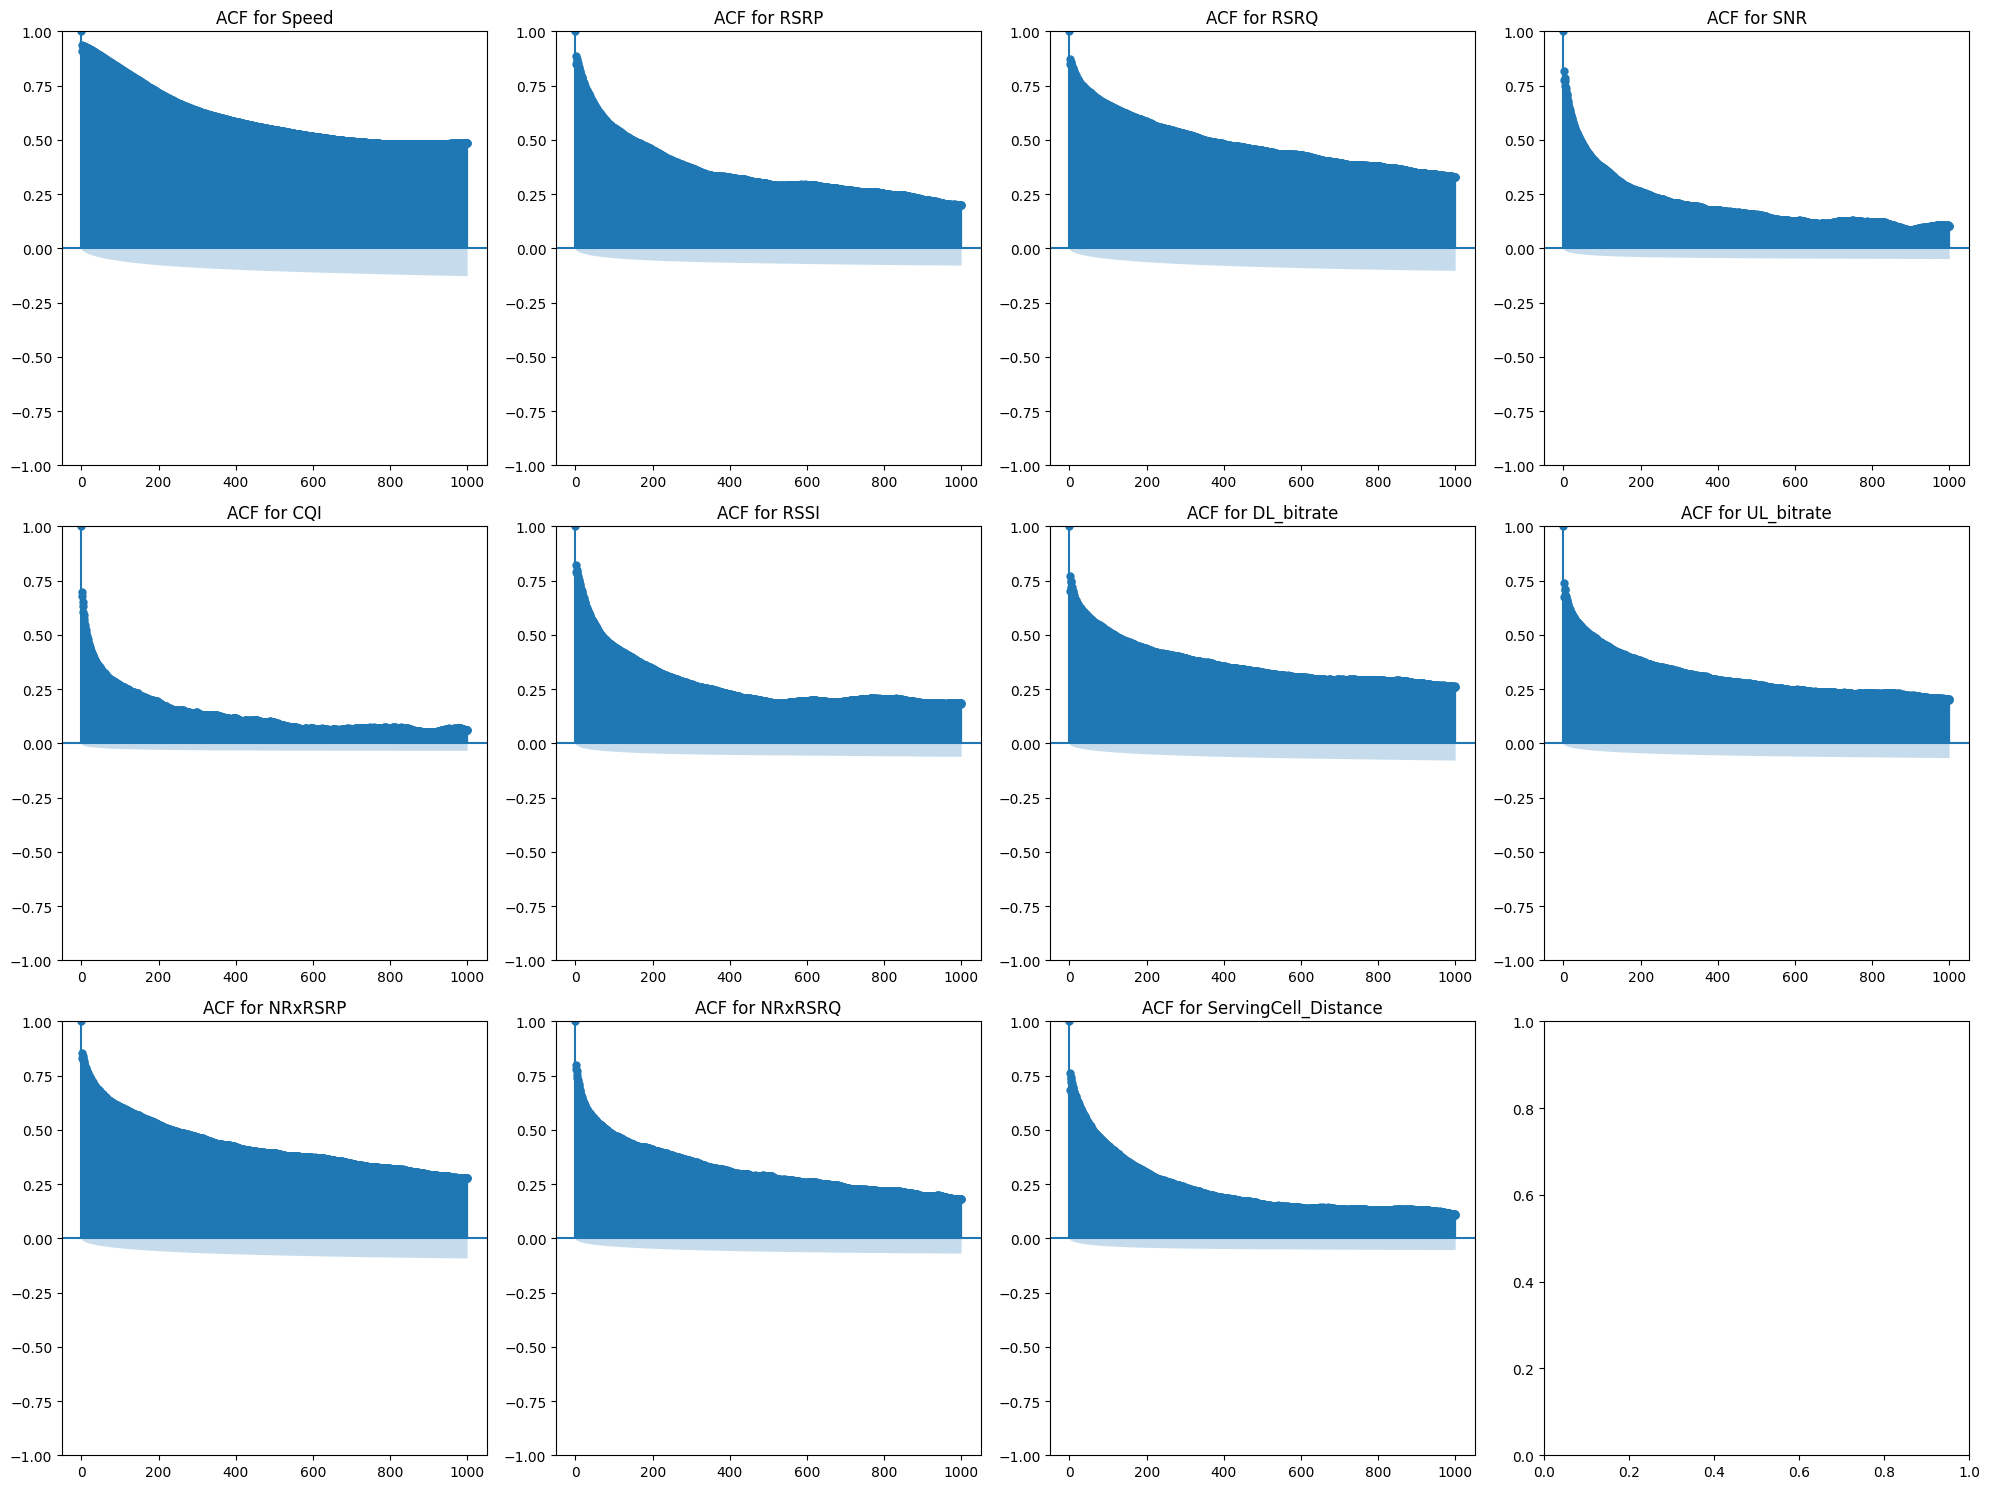

In [20]:
import statsmodels.api as sm

# Επιλογή όλων των αριθμητικών στηλών
features = ['Speed', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI',
       'DL_bitrate', 'UL_bitrate', 'NRxRSRP', 'NRxRSRQ',
       'ServingCell_Distance', 'Categorical_Impact']

# Υπολογισμός και σχεδίαση ACF για κάθε αριθμητικό χαρακτηριστικό
rows, cols = 3, 4
num_features = len(features)
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Σχεδίαση των ACF plots
for i, column in enumerate(numeric_columns):
    row, col = divmod(i, cols)  # Υπολογισμός της θέσης στο grid
    sm.graphics.tsa.plot_acf(df[column].dropna(), lags=1000, alpha=0.05, ax=axes[row, col]) # 1000 seconds
    axes[row, col].set_title(f"ACF for {column}")

plt.tight_layout()
plt.show()

**We choose to create lags organized in frames of 100 secs each.**

In [21]:
# Ορισμός διαστήματος καθυστέρησης (lag interval)
lag_interval = 100  # Δημιουργία lags ανά 100 δευτερόλεπτα

# Δημιουργία νέων στηλών με τα lags
for feature in features:
    for lag in range(lag_interval, lag_interval * 5 + 1, lag_interval):  # Δημιουργούμε 5 διαφορετικά lags
        df[f"{feature}_lag_{lag}"] = df[feature].shift(lag)

# Αφαίρεση των αρχικών γραμμών που περιέχουν NaN λόγω των lags
df = df.dropna()

In [22]:
df

,Speed,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ,...,ServingCell_Distance_lag_100,ServingCell_Distance_lag_200,ServingCell_Distance_lag_300,ServingCell_Distance_lag_400,ServingCell_Distance_lag_500,Categorical_Impact_lag_100,Categorical_Impact_lag_200,Categorical_Impact_lag_300,Categorical_Impact_lag_400,Categorical_Impact_lag_500
500,-0.774584,0.152911,-0.638928,0.920803,1.935626,1.270555,-0.797301,-0.741746,-1.275175e-15,-0.000262,...,-0.913114,-0.890458,-0.858296,-0.421987,-0.807820,0.664633,0.664633,0.664633,0.265154,0.664633
501,-0.774584,-0.349234,-0.824237,0.367149,-0.967871,0.091042,-0.844911,-0.903624,-1.275175e-15,-0.000262,...,-0.913114,-0.890458,-0.858296,0.622095,-0.807820,0.664633,0.664633,0.664633,0.265154,0.536313
502,-0.774584,-0.349234,-0.824237,0.367149,-0.967871,0.091042,-0.885296,-0.909206,-1.275175e-15,-0.000262,...,-0.913114,-0.890458,-0.858296,0.622095,-0.807241,0.664633,0.664633,0.664633,0.265154,0.536313
503,-0.774584,-0.788612,-0.824237,-0.740160,-0.483955,-0.941032,-0.820087,-0.836640,-1.275175e-15,-0.000262,...,-0.914556,-0.893423,-0.858296,-0.828713,-0.804415,0.664633,0.664633,0.664633,0.664633,0.536313
504,-0.746068,-0.788612,-0.824237,-0.740160,1.451710,0.091042,-0.766178,-0.725000,-1.275175e-15,-0.000262,...,-0.914556,-0.893423,-0.861046,-0.828713,-0.804415,0.664633,0.664633,0.664633,0.664633,0.536313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173687,-0.831615,-0.788612,-0.268309,1.474457,0.967794,-0.351275,2.331298,2.487438,-1.275175e-15,-0.000262,...,-0.849081,-0.777253,-0.849081,-0.777253,-0.849081,0.526842,0.533006,0.526842,0.533006,0.526842
173688,-0.831615,-0.914148,-0.638928,-0.371057,-0.483955,-1.383349,-0.491634,-0.529630,-1.275175e-15,-0.000262,...,-0.777253,-0.849081,-0.849081,-0.849081,-0.777253,0.533006,0.526842,0.526842,0.526842,0.533006
173689,-0.831615,-0.788612,-0.268309,1.474457,0.967794,-0.351275,2.331298,2.487438,-1.275175e-15,-0.000262,...,-0.849081,-0.777253,-0.777253,-0.777253,-0.849081,0.526842,0.533006,0.533006,0.533006,0.526842
173690,-0.831615,-0.537539,-0.453619,1.751284,1.935626,-0.056397,2.331298,2.487438,-1.275175e-15,-0.000262,...,-0.777253,-0.849081,-0.849081,-0.777253,-0.777253,0.533006,0.526842,0.526842,0.533006,0.533006


In [24]:
# Αποθήκευση του τελικού επεξεργασμένου dataset
df.to_csv("drive/MyDrive/final_dataset.csv", index=False)

**Check how target is related with the input features**

<ipython-input-17-ea254c0e3cad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dl_bitrate_corr.index, y=dl_bitrate_corr.values, palette='viridis')


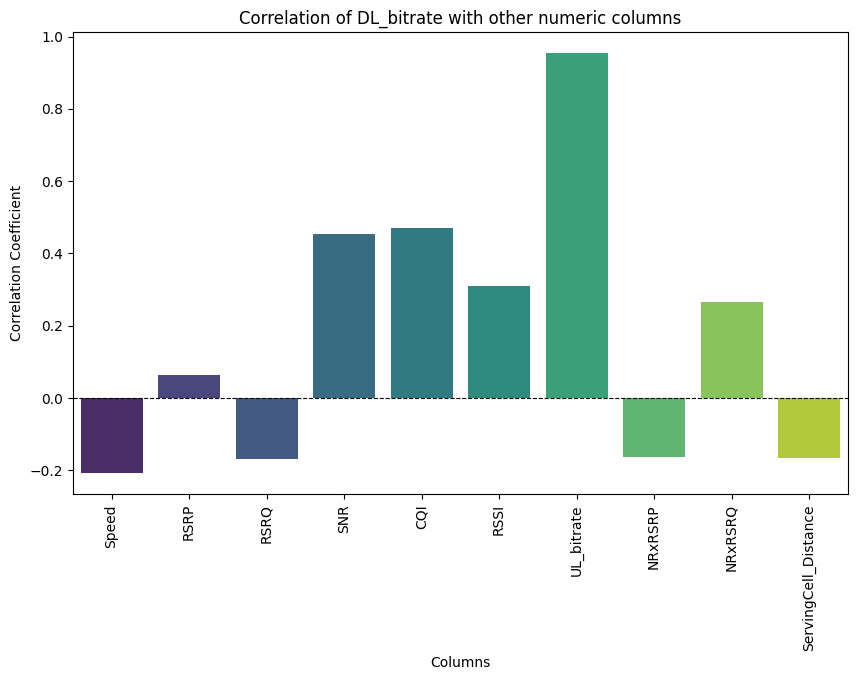

<ipython-input-17-ea254c0e3cad>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_corr_df.index, y=category_corr_df['Correlation'], palette='magma')


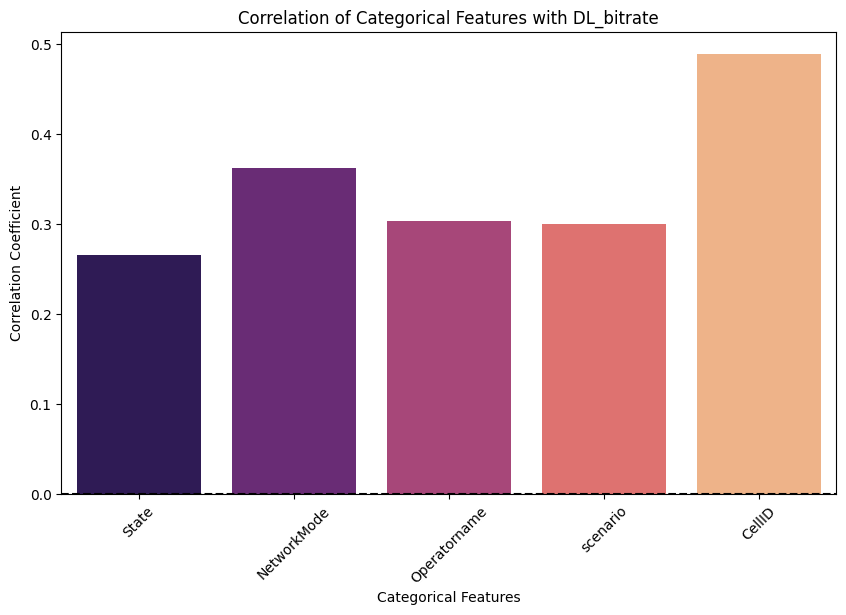

In [17]:
# Υπολογισμός συντελεστών συσχέτισης
correlations = df[numeric_columns].corr()

# Εστίαση στη συσχέτιση με τη στήλη DL_bitrate
dl_bitrate_corr = correlations['DL_bitrate'].drop('DL_bitrate')  # Αφαιρούμε τη συσχέτιση της στήλης με τον εαυτό της

# Οπτικοποίηση μέσω barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=dl_bitrate_corr.index, y=dl_bitrate_corr.values, palette='viridis')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Correlation of DL_bitrate with other numeric columns")
plt.xticks(rotation=90)
plt.ylabel("Correlation Coefficient")
plt.xlabel("Columns")
plt.show()

# Define categorical columns
categorical_columns = ['State', 'NetworkMode', 'Operatorname', 'scenario', 'CellID']

# Dictionary to store correlations
category_correlations = {}

# Compute correlation for each categorical variable
for cat_col in categorical_columns:
    # Convert categories into their mean DL_bitrate (Target Encoding)
    encoded_values = df.groupby(cat_col)['DL_bitrate'].transform('mean')

    # Compute Pearson correlation between encoded values and target
    correlation = np.corrcoef(encoded_values, df['DL_bitrate'])[0, 1]

    category_correlations[cat_col] = correlation

# Convert dictionary to DataFrame for visualization
category_corr_df = pd.DataFrame.from_dict(category_correlations, orient='index', columns=['Correlation'])

# Plot the categorical correlations as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_corr_df.index, y=category_corr_df['Correlation'], palette='magma')
plt.axhline(0, color='black', linestyle='--')
plt.title("Correlation of Categorical Features with DL_bitrate")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Categorical Features")
plt.xticks(rotation=45)
plt.show()